#                        Random forest Project - Taxi dataset

# Abstract:
   In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 millionyear, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data-centric.Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? Afterall, that set price is not a random guess.

# Problem Statement:
   Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.

## Prepare and analyse data

## libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
mydata = pd.read_csv("TaxiFare.csv")
mydata

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
mydata = mydata.drop('date_time_of_pickup',axis = 1) # dropping date time features

In [5]:
mydata.head(10)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,-73.980658,40.733873,-73.991540,40.758138,2


In [6]:
mydata.info() checking #info after dropping the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


### Feature engineering

In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()  # converting datatype to numeric

In [8]:
mydata["unique_id"]=LE.fit_transform(mydata.unique_id)


In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  int64  
 1   amount                50000 non-null  float64
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.7 MB


### Measure of dispersion

In [10]:
mydata.describe()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1793.93710,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,1037.39357,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,0.00000,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,900.00000,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,1798.00000,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,2697.00000,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,3596.00000,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


## Correlation 

In [11]:
mydata_corr = mydata.corr()
mydata_corr

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
unique_id,1.000000,-0.012349,0.005004,-0.006088,0.007732,-0.006911,-0.000947
amount,-0.012349,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005004,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.006088,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.007732,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.006911,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,-0.000947,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


## Heatmap

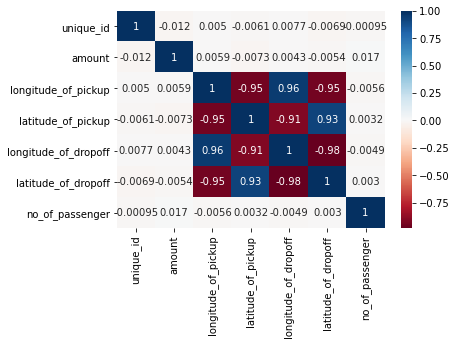

In [62]:
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu')

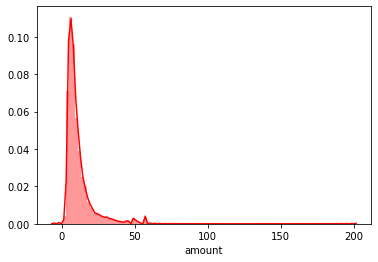

In [13]:
sns.distplot(mydata["amount"],color="red",bins=100)

### Boxplot : To check outlier

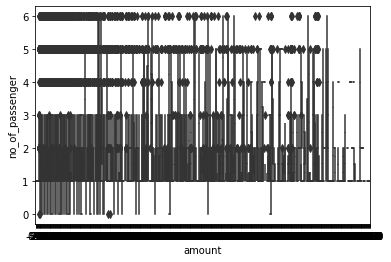

In [14]:
sns.boxplot(x='amount',y='no_of_passenger',data=mydata,palette='winter');

### Separating independent and dependent variable

### Independent variable

In [15]:
x_ind=mydata.drop('amount',axis =1)

## Dependent variable

In [16]:
y_dep = mydata['amount']

# Training a Random Forest model with data and check it’s performance

In [17]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

## Train and test model

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=3)

## Random forest model

In [19]:
model_rf=RandomForestRegressor(random_state=2)

## Model fitting

In [20]:
model_rf=model_rf.fit(x_train,y_train)

## Model predict using Xtest

In [21]:
y_pred=model_rf.predict(x_test)
y_pred

array([41.0719,  8.44  ,  6.339 , ...,  9.294 , 33.2385,  7.084 ])

## Accuracy score 

In [22]:
model_rf.score(x_test,y_test)

0.7760989758826248

In [23]:
model_rf.score(x_train,y_train)

0.9517907659866376

## Mean square error

In [24]:
from sklearn.metrics import mean_squared_error # because our data is continous

In [25]:
MSE = mean_squared_error(y_test,y_pred)

In [26]:
MSE

20.373012573665168

In [27]:
mean = np.sqrt(MSE)
mean

4.5136473692198384

## DataFrame using y_test and y_pred

In [28]:
f_com = pd.DataFrame({'Actual':y_test,'Machine_pred':y_pred})
f_com

,Actual,Machine_pred
35437,28.27,41.0719
16296,5.70,8.4400
23122,5.00,6.3390
9436,6.50,5.5570
11959,6.10,8.5730
...,...,...
28006,5.70,7.7960
47152,6.90,6.9120
47805,9.00,9.2940
10704,28.90,33.2385


## Residual

In [29]:
Residual = y_test - y_pred
Residual

35437   -12.8019
16296    -2.7400
23122    -1.3390
9436      0.9430
11959    -2.4730
          ...   
28006    -2.0960
47152    -0.0120
47805    -0.2940
10704    -4.3385
19915     1.4160
Name: amount, Length: 10000, dtype: float64

In [30]:
comp_g = f_com.head(50)

## Bar plot using Actual and predicted

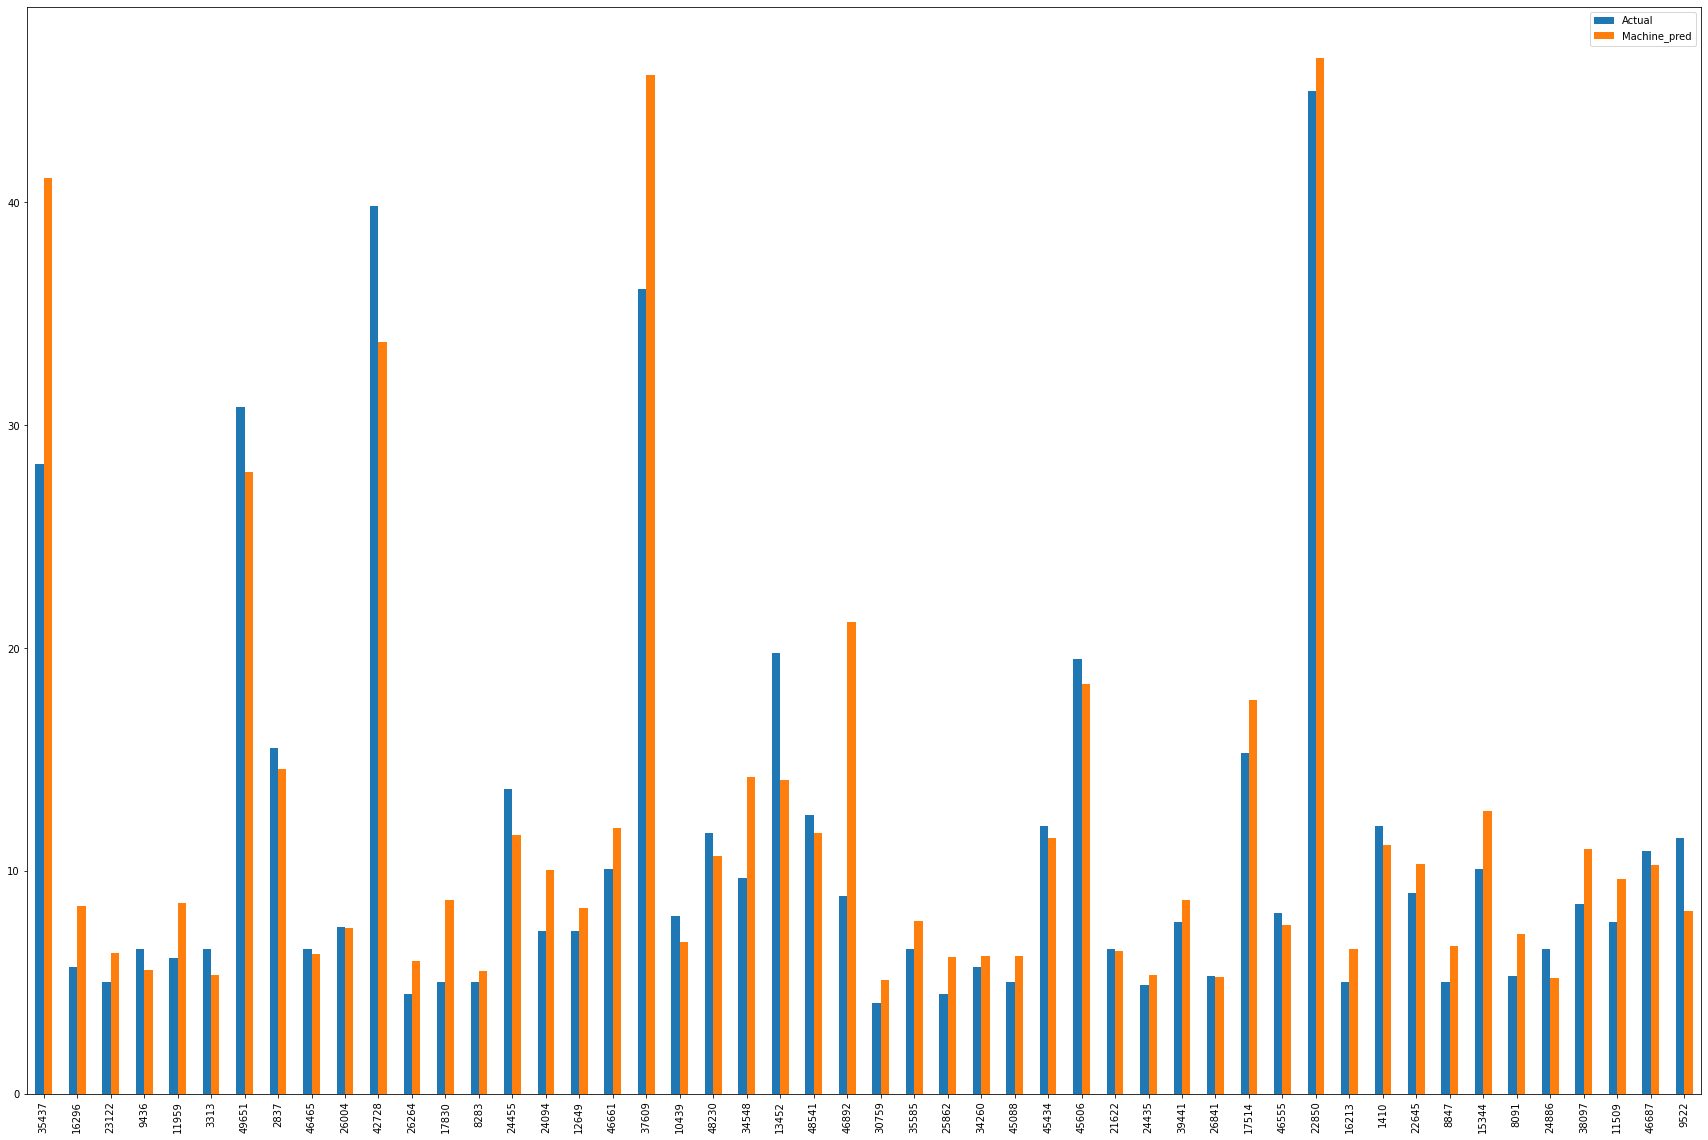

In [31]:
comp_g.plot(kind='bar',figsize= (30,20))

# Hyperparameter tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
parameters={"n_estimators":(200,300,400,500),
           "max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6),"random_state":(0,1,2,3,4,5)}

## Create the model

In [34]:
RF=RandomizedSearchCV(RandomForestRegressor(),param_distributions=parameters,cv=5)

## Fit the model

In [35]:
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (200, 300, 400, 500),
                                        'random_state': (0, 1, 2, 3, 4, 5)})

## Best estimator

In [36]:
RF.best_estimator_

RandomForestRegressor(max_features='log2', min_samples_split=6,
                      n_estimators=400, random_state=2)

## Model after Hyperparameter Tuning

In [37]:
model_hp = RandomForestRegressor(max_features='log2', min_samples_split=6,
                      n_estimators=400, random_state=2)

## Fit the model after Optimization 

In [38]:
model_hp = model_hp.fit(x_train,y_train)

## Predicted after optimization

In [39]:
y_pred_hp=model_hp.predict(x_test)
y_pred_hp

array([37.21703829,  7.7603156 ,  6.44973116, ...,  8.49360886,
       32.95685144,  6.91090955])

In [40]:
f_com_hp = pd.DataFrame({'Actual':y_test,'Machine_pred':y_pred_hp})
f_com_hp

,Actual,Machine_pred
35437,28.27,37.217038
16296,5.70,7.760316
23122,5.00,6.449731
9436,6.50,5.540360
11959,6.10,8.434328
...,...,...
28006,5.70,7.643070
47152,6.90,6.632072
47805,9.00,8.493609
10704,28.90,32.956851


## Optimization Residual

In [41]:
Residual_hp = y_test-y_pred_hp
Residual_hp

35437   -8.947038
16296   -2.060316
23122   -1.449731
9436     0.959640
11959   -2.334328
           ...   
28006   -1.943070
47152    0.267928
47805    0.506391
10704   -4.056851
19915    1.589090
Name: amount, Length: 10000, dtype: float64

## Accuracy score after optimization 

In [43]:
model_hp.score(x_test,y_test)

0.7822925065440527

## Thus our model accuracy after optimization technique hyperparameter tuning is 78%.After optimization we have an improvement in our model

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
MSE_hp = mean_squared_error(y_test,y_pred_hp)

In [47]:
MSE_hp

19.809456071241556

In [51]:
root_mean_hp = np.sqrt(MSE_hp)
root_mean_hp

4.450781512413473

In [54]:
comp_hp = f_com_hp.head(50)

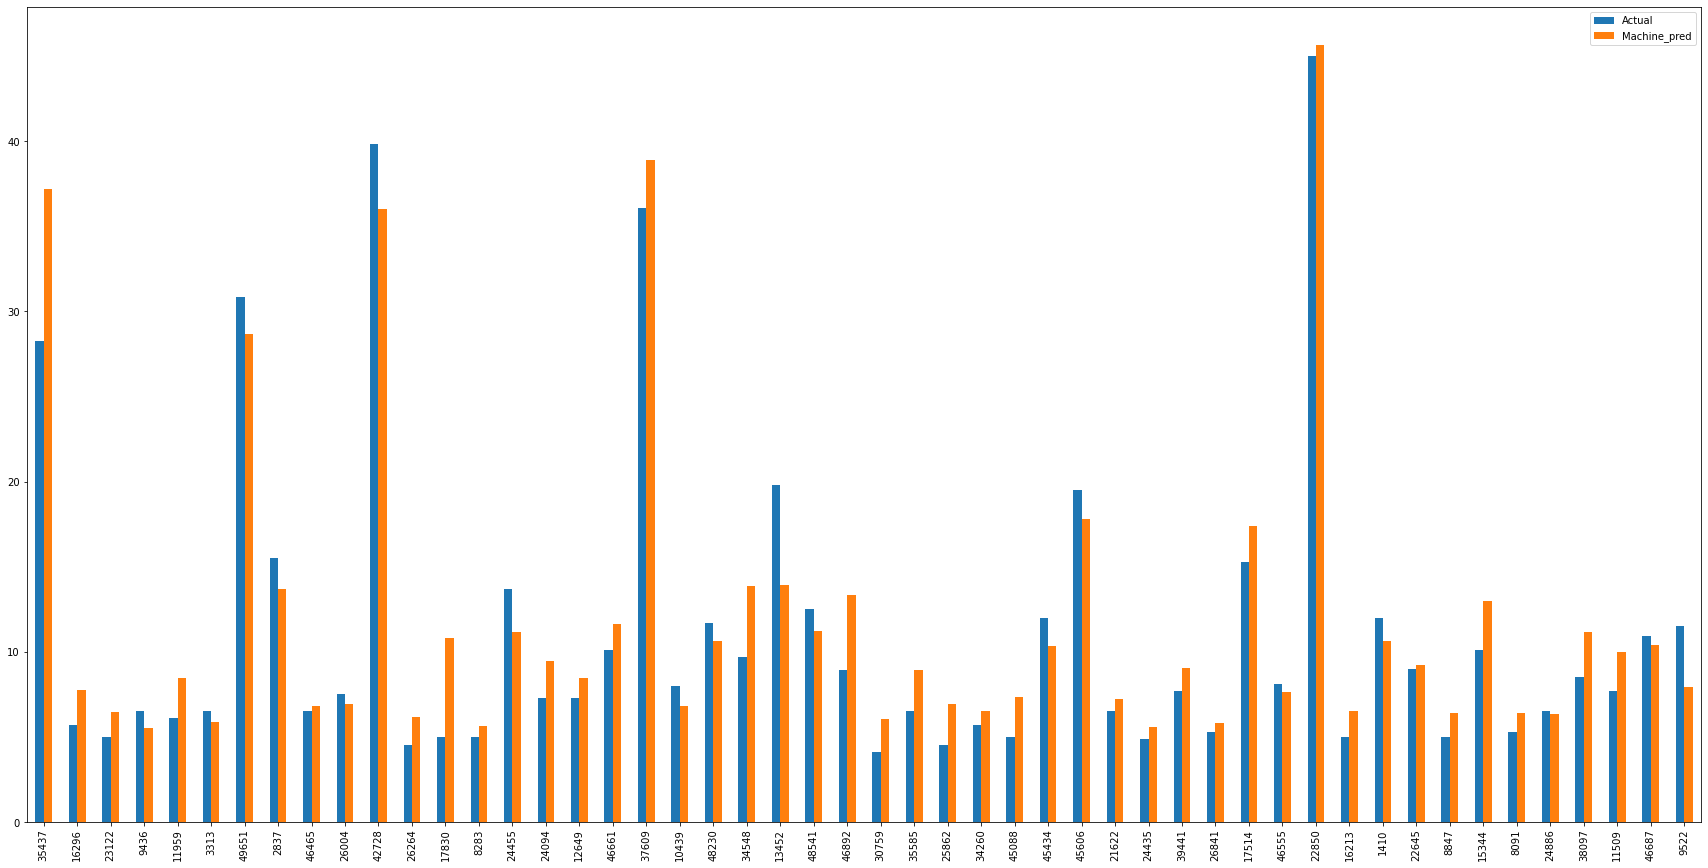

In [55]:
comp_hp.plot(kind='bar',figsize=(30,15))

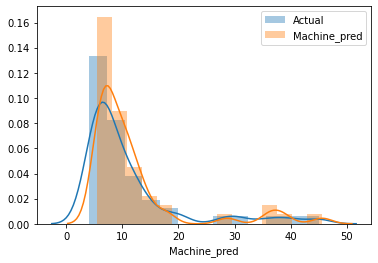

In [60]:
sns.distplot(comp_hp['Actual'])
sns.distplot(comp_hp['Machine_pred'])
plt.legend(['Actual', 'Machine_pred'])

# Conclusion:
  Thus our predicted model using random forest gives us the accuracy of 78% of actual predicted model of taxi fare.The priceof all apps is not random guess.By using our model random forest we can predict the prie of a taxi using app.The taxi can imporve the price based on this model.